In [71]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

In [ ]:
from ucimlrepo import fetch_ucirepo 
# Dataset https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets 
  
dataset = pd.concat([X, y], axis=1)
dataset.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


### Preprocessing

#### Missing Values

In [73]:
dataset.isnull().sum()

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [74]:
dataset.ffill(inplace=True)
dataset.isnull().sum()

Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

#### Numeric Column Conversion

In [75]:
dataset = dataset.apply(pd.to_numeric, errors='coerce')

#### Encoding Class column

In [76]:
dataset['Class'] = dataset['Class'].map({2: 0, 4: 1})

#### Splitting

In [77]:
X = dataset.drop(columns=['Class'])
y = dataset['Class']

### Feature Scaling

In [78]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

#X_scaled = scaler.fit_transform(X)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


### Train Test Split

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Artificial Neural Networks

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Dense(32, input_dim=9, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train, y_train, validation_split=0.2, epochs=300, batch_size=8, callbacks=[early_stop], verbose=0)

y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

print("Classification Report:\n")
print(classification_report(y_test, y_pred_labels, target_names=["Benign", "Malignant"]))
accuracy = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels)
recall = recall_score(y_test, y_pred_labels)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


e:\Free Lancing\ML and DL\ANN2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Classification Report:

              precision    recall  f1-score   support

      Benign       0.97      0.97      0.97        95
   Malignant       0.93      0.93      0.93        45

    accuracy                           0.96       140
   macro avg       0.95      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140

Accuracy: 0.96
Precision: 0.93
Recall: 0.93


### Decision Tree Classifier

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt_classifier.predict(X_test)

# Evaluation Metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)

print("Decision Tree Classifier Evaluation Metrics:")
print(f"Accuracy: {accuracy_dt:.2f}")
print(f"Precision: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_dt, target_names=["Benign", "Malignant"]))

Decision Tree Classifier Evaluation Metrics:
Accuracy: 0.94
Precision: 0.95
Recall: 0.87

Classification Report:

              precision    recall  f1-score   support

      Benign       0.94      0.98      0.96        95
   Malignant       0.95      0.87      0.91        45

    accuracy                           0.94       140
   macro avg       0.95      0.92      0.93       140
weighted avg       0.94      0.94      0.94       140



### Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluation Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

print("Random Forest Classifier Evaluation Metrics:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")

Random Forest Classifier Evaluation Metrics:
Accuracy: 0.96
Precision: 0.95
Recall: 0.93


### Visualization

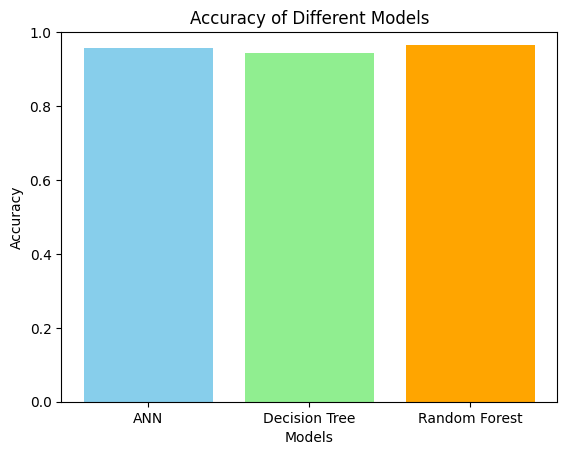

In [83]:
import matplotlib.pyplot as plt

# Model names and their corresponding accuracies
models = ['ANN', 'Decision Tree', 'Random Forest']
accuracies = [accuracy, accuracy_dt, accuracy_rf]
colors = ['skyblue', 'lightgreen', 'orange']

# Plotting the accuracies
plt.bar(models, accuracies, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 1)  # Set y-axis range from 0 to 1
plt.show()

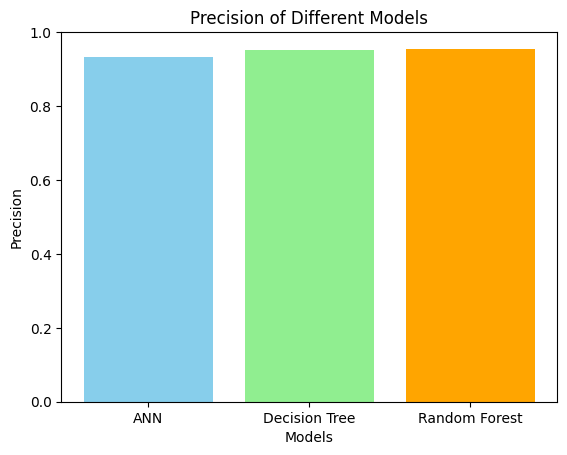

In [84]:
# Model names and their corresponding precisions
precisions = [precision, precision_dt, precision_rf]

# Plotting the precisions
plt.bar(models, precisions, color=colors)
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision of Different Models')
plt.ylim(0, 1)  # Set y-axis range from 0 to 1
plt.show()

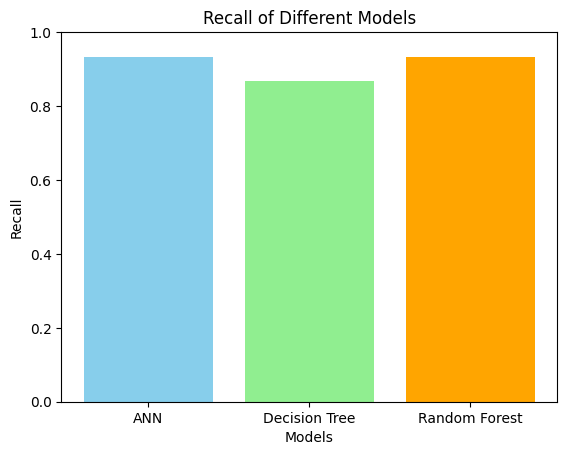

In [85]:
# Model names and their corresponding recalls
recalls = [recall, recall_dt, recall_rf]

# Plotting the recalls
plt.bar(models, recalls, color=colors)
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall of Different Models')
plt.ylim(0, 1)  # Set y-axis range from 0 to 1
plt.show()

### Conclusion

Here is the LaTeX table code highlighting the best model (Random Forest) with a color (e.g., `\cellcolor{lightgreen}`):

```latex
\documentclass{article}
\usepackage[table,xcdraw]{xcolor}
\usepackage{colortbl}

\begin{document}

\begin{table}[h!]
\centering
\begin{tabular}{|l|c|c|c|}
\hline
\rowcolor[HTML]{EFEFEF} 
\textbf{Model}         & \textbf{Accuracy} & \textbf{Precision} & \textbf{Recall} \\ \hline
ANN                    & 0.96              & 0.93               & 0.93            \\ \hline
Decision Tree          & 0.94              & 0.95               & 0.87            \\ \hline
\rowcolor{lightgreen} Random Forest & \textbf{0.96}     & \textbf{0.95}      & \textbf{0.93}   \\ \hline
\end{tabular}
\caption{Comparison of Model Metrics}
\label{tab:model_metrics}
\end{table}

\end{document}
```